In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.layers import AveragePooling2D, Conv2D, Dense, Flatten
from keras.models import Sequential
from keras.optimizers.legacy import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

CIFAR-10 stands for Canadian Institute For Advanced Research 10, which is a dataset of 50,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is commonly used for image classification tasks in machine learning and computer vision.


The 10 classes in the CIFAR-10 dataset are:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index][0]]))

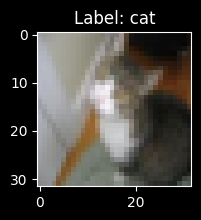

In [9]:
plot_sample(101)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(32, 32, 3), name="input_layer"),
        Dense(1600, activation="sigmoid", name="hidden_layer_1"),
        Dense(800, activation="sigmoid", name="hidden_layer_2"),
        Dense(400, activation="sigmoid", name="hidden_layer_3"),
        Dense(200, activation="sigmoid", name="hidden_layer_4"),
        Dense(100, activation="sigmoid", name="hidden_layer_5"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

2023-08-03 14:24:25.633454: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-03 14:24:25.633569: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-03 14:24:25.633702: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-03 14:24:25.634027: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-03 14:24:25.634052: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
ann.layers

In [13]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 1600)              4916800   
                                                                 
 hidden_layer_2 (Dense)      (None, 800)               1280800   
                                                                 
 hidden_layer_3 (Dense)      (None, 400)               320400    
                                                                 
 hidden_layer_4 (Dense)      (None, 200)               80200     
                                                                 
 hidden_layer_5 (Dense)      (None, 100)               20100     
                                                                 
 output_layer (Dense)        (None, 10)                1010    

In [14]:
optimizer = Adam()
ann.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [15]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_ann",
    monitor="val_accuracy",
    save_best_only=True,
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_ann_logs", histogram_freq=1, write_images=True
)
epochs = 10
ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[ann_checkpoint_callback, ann_tensorboard_callback],
)

Epoch 1/10


2023-08-03 14:24:28.480611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 2.1075 - accuracy: 0.1757

2023-08-03 14:25:02.274611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


1407/1407 [==============================] - 39s 27ms/step - loss: 2.1075 - accuracy: 0.1757 - val_loss: 2.0899 - val_accuracy: 0.1822
Epoch 2/10
1407/1407 [==============================] - 32s 23ms/step - loss: 2.0481 - accuracy: 0.1967 - val_loss: 2.1319 - val_accuracy: 0.1766
Epoch 3/10
1407/1407 [==============================] - ETA: 0s - loss: 2.0258 - accuracy: 0.2037INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


1407/1407 [==============================] - 36s 26ms/step - loss: 2.0258 - accuracy: 0.2037 - val_loss: 2.0037 - val_accuracy: 0.2178
Epoch 4/10
1407/1407 [==============================] - 34s 24ms/step - loss: 2.0029 - accuracy: 0.2181 - val_loss: 2.0604 - val_accuracy: 0.2056
Epoch 5/10
1407/1407 [==============================] - 33s 23ms/step - loss: 1.9931 - accuracy: 0.2235 - val_loss: 2.0814 - val_accuracy: 0.2014
Epoch 6/10
1407/1407 [==============================] - ETA: 0s - loss: 1.9673 - accuracy: 0.2431INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


1407/1407 [==============================] - 34s 24ms/step - loss: 1.9673 - accuracy: 0.2431 - val_loss: 1.9391 - val_accuracy: 0.2450
Epoch 7/10
1406/1407 [============================>.] - ETA: 0s - loss: 1.9215 - accuracy: 0.2638INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


1407/1407 [==============================] - 36s 25ms/step - loss: 1.9215 - accuracy: 0.2638 - val_loss: 1.9247 - val_accuracy: 0.2666
Epoch 8/10
1407/1407 [==============================] - ETA: 0s - loss: 1.8911 - accuracy: 0.2801INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


1407/1407 [==============================] - 37s 27ms/step - loss: 1.8911 - accuracy: 0.2801 - val_loss: 1.8840 - val_accuracy: 0.2932
Epoch 9/10
1407/1407 [==============================] - ETA: 0s - loss: 1.8627 - accuracy: 0.2981INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_ann/assets


1407/1407 [==============================] - 40s 29ms/step - loss: 1.8627 - accuracy: 0.2981 - val_loss: 1.8399 - val_accuracy: 0.3084
Epoch 10/10
1407/1407 [==============================] - 42s 30ms/step - loss: 1.8479 - accuracy: 0.3070 - val_loss: 1.8547 - val_accuracy: 0.2960


In [16]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["accuracy"]
ann_val_acc = ann_history.history["val_accuracy"]
ann_val_loss = ann_history.history["val_loss"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 1.9667793273925782
Validation loss: 1.9809674382209779
0.240971 Training accuracy with a standard deviation of 0.042561
0.239280 Validation accuracy with a standard deviation of 0.046796


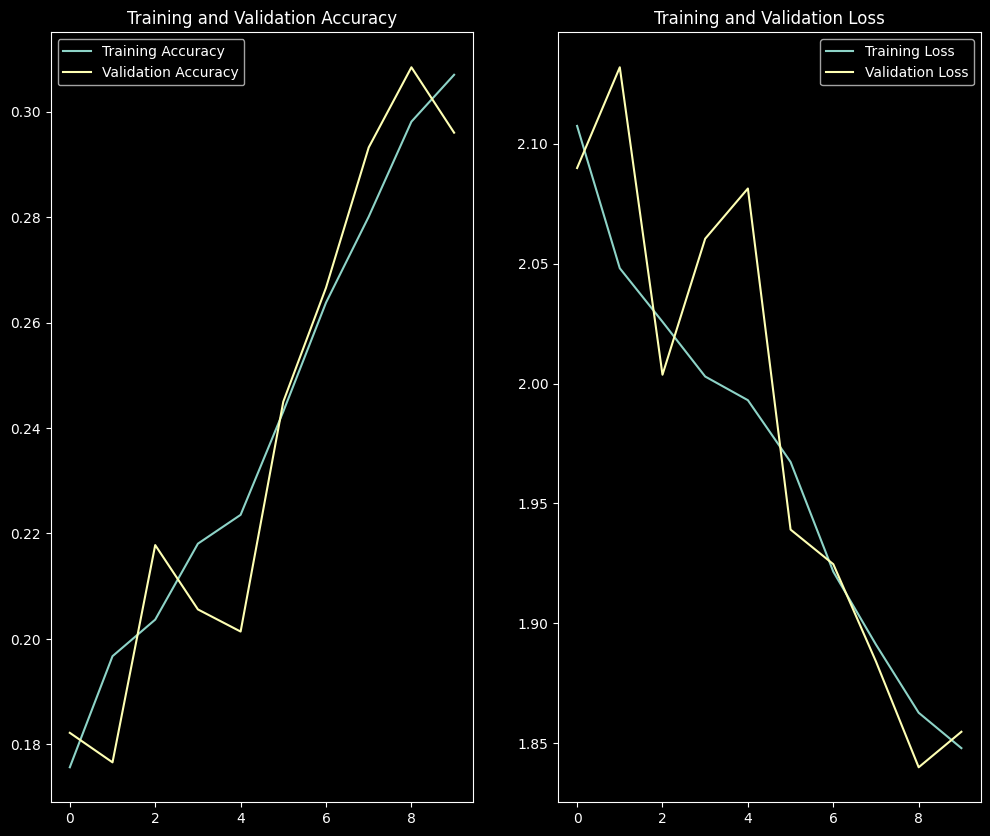

In [17]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_ann_acc_loss.png", bbox_inches="tight")

In [18]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 4s 11ms/step - loss: 1.8444 - accuracy: 0.3071
Test loss: 1.8443505764007568
Test accuracy: 0.30709999799728394


In [19]:
y_pred = ann.predict(X_test)

 27/313 [=>............................] - ETA: 1s

2023-08-03 14:30:38.111508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step


In [20]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation="relu",
            input_shape=(32, 32, 3),
            name="conv_layer_1",
        ),
        AveragePooling2D((2, 2), name="pooling_layer_1"),
        Conv2D(filters=64, kernel_size=(3, 3), activation="relu", name="conv_layer_2"),
        AveragePooling2D((2, 2), name="pooling_layer_2"),
        Flatten(name="flatten_layer"),
        Dense(1600, activation="sigmoid", name="dense_layer_1"),
        Dense(800, activation="sigmoid", name="dense_layer_2"),
        Dense(400, activation="sigmoid", name="dense_layer_3"),
        Dense(200, activation="sigmoid", name="dense_layer_4"),
        Dense(100, activation="sigmoid", name="dense_layer_5"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [21]:
cnn.layers

In [22]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 30, 30, 32)        896       
                                                                 
 pooling_layer_1 (AveragePo  (None, 15, 15, 32)        0         
 oling2D)                                                        
                                                                 
 conv_layer_2 (Conv2D)       (None, 13, 13, 64)        18496     
                                                                 
 pooling_layer_2 (AveragePo  (None, 6, 6, 64)          0         
 oling2D)                                                        
                                                                 
 flatten_layer (Flatten)     (None, 2304)              0         
                                                                 
 dense_layer_1 (Dense)       (None, 1600)              3688000 

In [23]:
cnn.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [24]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_cnn",
    monitor="val_accuracy",
    save_best_only=True,
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_cnn_logs", histogram_freq=1, write_images=True
)
cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[cnn_checkpoint_callback, cnn_tensorboard_callback],
)

Epoch 1/10


2023-08-03 14:30:47.745480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 2.3101 - accuracy: 0.0997

2023-08-03 14:31:47.785547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


1407/1407 [==============================] - 68s 47ms/step - loss: 2.3101 - accuracy: 0.0997 - val_loss: 2.3052 - val_accuracy: 0.0986
Epoch 2/10
1407/1407 [==============================] - ETA: 0s - loss: 2.3040 - accuracy: 0.1001INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


INFO:tensorflow:Assets written to: ../Models/cifar10_cnn/assets


1407/1407 [==============================] - 66s 47ms/step - loss: 2.3040 - accuracy: 0.1001 - val_loss: 2.3024 - val_accuracy: 0.1024
Epoch 3/10
1407/1407 [==============================] - 63s 45ms/step - loss: 2.3033 - accuracy: 0.0974 - val_loss: 2.3032 - val_accuracy: 0.0976
Epoch 4/10
1407/1407 [==============================] - 63s 45ms/step - loss: 2.3030 - accuracy: 0.1000 - val_loss: 2.3039 - val_accuracy: 0.0950
Epoch 5/10
1407/1407 [==============================] - 990s 704ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0950
Epoch 6/10
1407/1407 [==============================] - 40s 29ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 7/10
1407/1407 [==============================] - 360s 256ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3029 - val_accuracy: 0.0950
Epoch 8/10
1407/1407 [==============================] - 41s 29ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3031 - val_ac

In [25]:
cnn_train_acc = cnn_history.history["accuracy"]
cnn_val_acc = cnn_history.history["val_accuracy"]
cnn_train_loss = cnn_history.history["loss"]
cnn_val_loss = cnn_history.history["val_loss"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 2.3037343502044676
Validation loss: 2.3031991481781007
0.098747 Training accuracy with a standard deviation of 0.001118
0.097060 Validation accuracy with a standard deviation of 0.002289


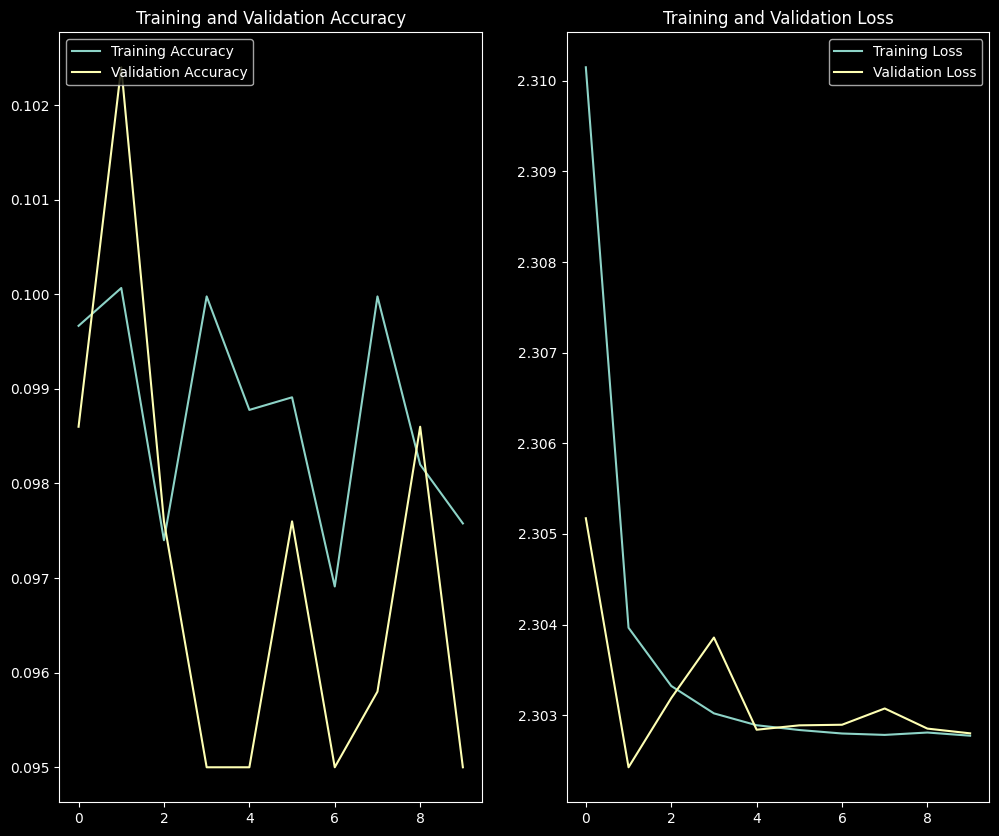

In [26]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_cnn_acc_loss.png", bbox_inches="tight")

In [27]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 2.3026 - accuracy: 0.1000
Test loss: 2.30263614654541
Test accuracy: 0.10000000149011612


In [28]:
y_pred = cnn.predict(X_test)

  7/313 [..............................] - ETA: 2s  

2023-08-03 15:00:26.740936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step
